# G-Formula for time-varying causal inference.

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from causallib.time_varying.treament_strategy import CFBernoulli
from causallib.time_varying.GFormula import GFormula

/Users/julinamaharjan/opt/anaconda3/envs/j_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_obs = pd.read_csv('../../gnet_robust_rnn/easiest_sim_x2/data/easiest_gnet_data_obs_2x.csv') #, index_col=0)

In [4]:
df_obs_ids = df_obs.id.unique()
print(len(df_obs_ids))
df_obs.head()

10000


,A,X,X2,time,id
0,0,-0.326233,1.329799,1,1
1,1,1.014886,1.272429,2,1
2,0,0.960009,0.414641,3,1
3,0,2.940409,-1.539950,4,1
4,1,3.767785,-0.928567,5,1


In [5]:
# df_obs.columns.tolist()
X = df_obs[['id', 'time', 'X', 'X2']]
a = df_obs[['A']]
# t=

In [6]:
covariate_models = {
    'X':  LinearRegression(),
    'X2': LinearRegression()
}
treatment_model = LogisticRegression(solver="liblinear")
treatment_strategy = CFBernoulli()

In [7]:
gFormula = GFormula(treatment_model=treatment_model,
                    covariate_models=covariate_models,
                    outcome_model=None,
                    refit_models=False,
                    random_state=None,
                    n_obsv=5,
                    n_sims=1,
                    n_steps=5,
                    mode='normal',
                    resid_val=None,
                    )

In [8]:
X.head()

,id,time,X,X2
0,1,1,-0.326233,1.329799
1,1,2,1.014886,1.272429
2,1,3,0.960009,0.414641
3,1,4,2.940409,-1.539950
4,1,5,3.767785,-0.928567


In [9]:
a.head()

,A
0,0
1,1
2,0
3,0
4,1


In [10]:
gFormula.fit(X, a, t=None, y=None)

/Users/julinamaharjan/opt/anaconda3/envs/j_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GFormula(covariate_models={'X': LinearRegression(), 'X2': LinearRegression()}, id_col=id, mode=normal, n_obsv=5, n_sims=1, n_steps=5, outcome_model=None, predict_proba=False, random_state=None, refit_models=False, resid_val=None, treatment_model=LogisticRegression(solver='liblinear'))

In [12]:
a = df_obs[['id', 'A']]
est_outcome = gFormula.estimate_individual_outcome(
                                                    X,
                                                    a,
                                                    t=None,
                                                    y=None,
                                                    treatment_strategy=treatment_strategy
                                                )
est_outcome

,X,X2,A,id
0,3.865120,-0.751214,0.0,1
1,3.167698,-1.764660,0.0,1
2,1.911459,-1.792255,0.0,1
3,3.274005,0.106613,0.0,1
4,4.686504,-0.587876,0.0,1
...,...,...,...,...
0,3.463940,-1.129525,0.0,50
1,3.614376,-0.189365,0.0,50
2,3.684020,-0.240374,0.0,50
3,4.243718,1.033063,0.0,50


In [13]:
a = df_obs[['id', 'A']]
pop_outcome = gFormula.estimate_population_outcome(X, a, t=None, y=None, treatment_strategy=treatment_strategy )
pop_outcome

/Users/julinamaharjan/PycharmProjects/causallib/causallib/time_varying/GFormula.py:207: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  res = individual_prediction_curves.mean(level=0).reset_index()


,index,X,X2,A,id
0,0,2.727673,-0.108260,0.20,25.5
1,1,2.846672,-0.085509,0.16,25.5
2,2,3.150225,0.026014,0.14,25.5
3,3,3.679224,-0.025739,0.12,25.5
4,4,4.002635,0.023500,0.10,25.5


In [ ]:
# effect = gFormula.estimate_effect(pop_outcome[1], pop_outcome[0])

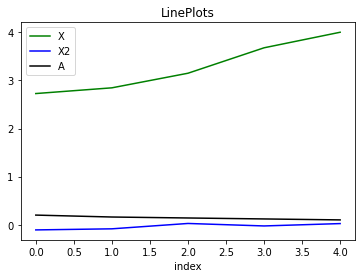

In [14]:
import matplotlib.pyplot as plt
#Get current axis
ax = plt.gca()

# line plot for math marks
pop_outcome.plot(kind = 'line',
        x = 'index',
        y = 'X',
        color = 'green',ax = ax)

# line plot for physics marks
pop_outcome.plot(kind = 'line',x = 'index',
        y = 'X2',
        color = 'blue',ax = ax)

# line plot for chemistry marks
pop_outcome.plot(kind = 'line',x = 'index',
        y = 'A',
        color = 'black',ax = ax)

# set the title
plt.title('LinePlots')

# show the plot
plt.show()